# Read this before you start your next assignment

> *CIS 2033, Spring 2017*

>  *April 9, 2017*

Your next assignment will have to do with the Weak Law of Large Numbers and with the Central Limit Theorem. This notebook contains the essential background information that you will find useful as you work on that assignment.


Recall from our earlier discussions that a histogram is a plot that represents the distribution of some numerical data. For example, we roll a fair six-sided die 100 times and look at the frequency with which each of the faces appear in the hundred rolls (i.e. face '1' appeared 33 times out of 100 times, face '2' showed up 21 out of 100 times, etc.)

In what follows, we begin by plotting a histogram for the frequency of the faces shown when a fair six-sided die is rolled 100, 10000 and 1000000 times. We note that as we increase the number of rolls, the distribution of the frequency of the faces shown becomes more and more "even".

We next look at how to draw samples from a random variable whose distribution is known. We will see how to plot histograms for the samples. We will also see that as we increase the size of the sample, the histograms become in some sense "close" to the true distribution from which we drew the samples. For concreteness, we look at the uniform distribution.

Finally, we return to the dice example to begin our study of the distribution of the sum of independently and identically distributed (i.i.d) random variables. There will be a sequel to this notebook.



### 1. Dice, again

A single roll of a fair six-sided die can be simulated as follows:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

random.choice([1, 2, 3, 4, 5, 6])

1

And rolling the die 100 times can be simulated as follows:

In [2]:
rolls = []
for k in range(100):
  rolls.append(random.choice([1, 2, 3, 4, 5, 6]))

print(rolls, end ="")

[5, 4, 2, 1, 6, 3, 6, 6, 6, 4, 6, 5, 6, 5, 2, 6, 2, 4, 1, 5, 6, 2, 1, 4, 4, 2, 3, 2, 4, 2, 3, 2, 6, 6, 5, 5, 2, 3, 6, 5, 5, 6, 3, 3, 2, 4, 4, 1, 4, 2, 4, 6, 5, 3, 6, 1, 4, 1, 1, 6, 2, 3, 4, 4, 1, 3, 4, 1, 6, 6, 2, 1, 2, 2, 4, 6, 3, 5, 2, 2, 5, 2, 3, 1, 4, 2, 4, 3, 6, 4, 4, 4, 5, 4, 1, 3, 3, 2, 5, 2]

This list `rolls` is of length 100, and the $i$th element in it is the face that showed on the $i$th roll of the die.

We now look at the frequency with which each of the 6 faces showed by plotting the histogram of this data. 

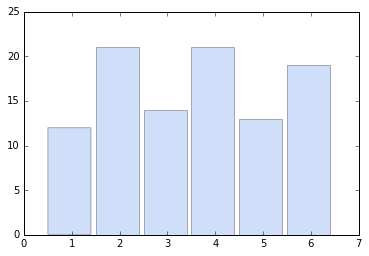

In [3]:
plt.hist(rolls, bins = np.linspace(0.5, 6.5, 7), color = "cornflowerblue", alpha=0.3, width = 0.9);

The height of each bar above each face in this plot corresponds to the number of times that face appeared in the hundred rolls.

As you can see, this distribution is far from being "even". When I plotted this histogram, face '1' appeared 11 times while face '4' appeared 24 times - more than twice as frequently. Try re-running the above code. Each time you will likely get a histogram with a different shape.

But now let's generate 1000000 rolls of the die and plot the histogram again.

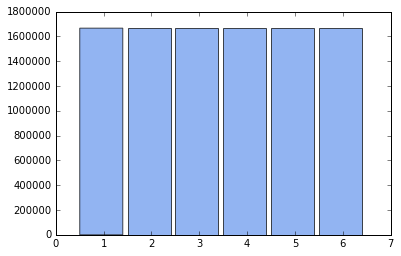

In [4]:
rolls = []
for k in range(10000000):
  rolls.append(random.choice([1, 2, 3, 4, 5, 6]))

plt.hist(rolls, bins = np.linspace(0.5, 6.5, 7), color = "cornflowerblue", alpha=0.7, width = 0.9);

As you can see, the distribution is now much more uniform.

### 2. Drawing Samples from the Uniform Distribution

We now draw samples from an uniform distribution. Let's take Uniform over $[0, 5]$. Here's how to draw a sample of size 1 (i.e. draw a single 'observation') from this distribution using `scipy`.

In [5]:
from scipy.stats import uniform
u = uniform.rvs(0, 5);  #generate a single observation drawn from the Uniform distribution over [0, 5]
print(u)

0.01996009619822048


And here's how to draw (generate a sample of) 100 observations from the same distribution.

In [6]:
u100 = uniform.rvs(0, 5, size=100);
#print(u100)
#print(len(u100))

Let us now draw the histogram for this sample of 100 observations. The histogram is built as follows:
* We split the interval $[0, 5]$ into 10 equal sized bins: bin 1 starts at $0$ and ends at $1/2$, bin 2 starts at $1/2$ and ends at $1$, $\ldots$, bin 10 starts at $4.5$ and ends at $5$. 
* Now, our 100 observations are scattered across the entire $[0, 5]$ interval. We look at how many of these fall into each one of the 10 bins. 
* We show the bins on the plot; the height of each bin corresponds to the number of observations that fell into that bin (we can also "normalize" the data, meaning that we can divide the number of observations that fell into each bin by the total number of observations (here 100) to clearly see the percentage of observations that fell into each bin.)

Moreover, let's also show the PDF of *Uniform [0, 5]* on the same plot to see how it compares to the histogram. 

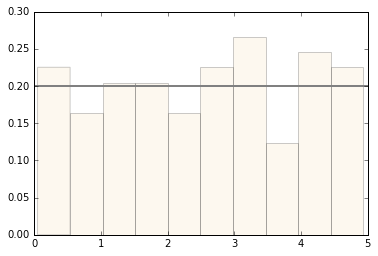

In [7]:
fig, ax = plt.subplots(1, 1)

# plot the PDF of Uniform[0,5]
x = np.linspace(0, 5, 100)
rv = uniform(0, 5);
ax.plot(x, rv.pdf(x), 'gray', lw=2)
ax.set_xlim(-.01, 5.01);

#generate 100 observations from Uniform[0,5] and plot its histogram
u100 = uniform.rvs(0, 5, size=100)
ax.hist(u100, normed=True, bins=10, color = "wheat", alpha=0.2);

As you can see, the histogram deviates quite substantially from the true PDF when we only have 100 observations. Let's see what happens if we generate way more than 100 observations.

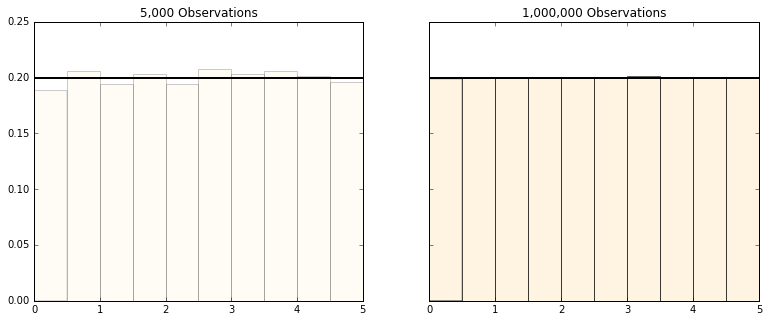

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

# plot the PDF of Uniform[0,5]
x = np.linspace(0, 5, 100)
rv = uniform(0, 5);
ax1.plot(x, rv.pdf(x), 'k-', lw=2)
ax2.plot(x, rv.pdf(x), 'k-', lw=2)
ax1.set_xlim(-.01, 5.01);

#generate 5000 observations from Uniform[0,5] and plot its histogram
us_many = uniform.rvs(0, 5, size=5000)
ax1.hist(us_many, normed=True, bins=10, color="blanchedalmond", alpha=0.2);
ax1.set_title('5,000 Observations')

#generate 1000000 observations from Uniform[0,5] and plot its histogram
ax2.set_title('1,000,000 Observations')
us_many_many = uniform.rvs(0, 5, size=1000000)
ax2.hist(us_many_many, normed=True, bins=10, color = "blanchedalmond", alpha=0.6);

So, the histogram becomes closer and closer to the PDF as we draw more and more observations. 

### 3. Introduction to the Central Limit Theorem

Consider an experiment that consists of 10 independent rolls a fair six-sided die. At each trial of this experiment we  record the sum of the 10 faces shown. We would like to say something about the distribution of this sum. Clearly this sum is somewhere between 10 and 60, and some values (like the values around 40 or so) seem more likely than the values at the extremes (like 10 or 60). But how exactly is this sum distributed? To learn more, we start by performing many trials and recording the results.

To be more concrete, we let $X_i$ be the random outcome of the $i$th toss of the die on a given trial, $i \in \{1, 2, \ldots, 10 \}$. We look at their sum:

$$
Y = \sum_{i = 1}^{10} X_i
$$

We would like to understand the distribution of $Y$ by simulating its values a large number of times and by the plotting its histogram.

( smallest value of ys = 15, largest value of ys = 57 )


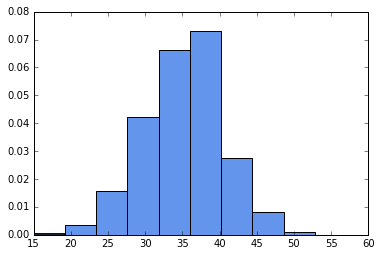

In [9]:
ys = []
for rep in range(100000):   # number of trials 
    y = 0
    for k in range(10):     # each trial: 10 tosses of a fair die
        x = random.choice([1, 2, 3, 4, 5, 6])
        y = y + x
    ys.append(y)

print("( smallest value of ys = " + str(min(ys)) + ", " + "" + "largest value of ys = " + str(max(ys)) + " )")
plt.hist(ys, normed = True, color = "cornflowerblue");

Try repeating this experiment several times. Increase the number of trials. Does the shape of the histogram remind you of any distribution that you already know about? 